<b>TextBlob & Vader</b>

In [1]:
import os
from textblob import TextBlob
from textblob import Word
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
text = TextBlob("TextBlob is a simple library to build sentiment analysis")

<b>TextBlob features - Part-of-speech Tagging</b>

In [3]:
text.tags

[('TextBlob', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('simple', 'JJ'),
 ('library', 'NN'),
 ('to', 'TO'),
 ('build', 'VB'),
 ('sentiment', 'NN'),
 ('analysis', 'NN')]

<b>TextBlob features - Noun Phrase Extraction</b>

In [4]:
text.noun_phrases

WordList(['textblob', 'simple library', 'sentiment analysis'])

<b>TextBlob features - Sentiment Analysis</b>

In [5]:
text.sentiment

Sentiment(polarity=0.0, subjectivity=0.35714285714285715)

<b>TextBlob features - Words Inflection and Lemmatization</b>

In [6]:
text.words

WordList(['TextBlob', 'is', 'a', 'simple', 'library', 'to', 'build', 'sentiment', 'analysis'])

In [7]:
w = Word("went")
w.lemmatize("v") 

'go'

<b>TextBlob features - Spelling Correction</b>

In [8]:
sentence = TextBlob("textblob simple libry for analyse")
print(sentence.correct())

textbook simple liberty for analyse


<b>------------------------------------------------------------------------------------------------------------------</b>

<b>Vader</b>

In [9]:
analyser = SentimentIntensityAnalyzer()

<b>Vader - sentiment analysis</b>

In [10]:
print(analyser.polarity_scores('The phone is super cool.'))

{'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


<b>Vader - sentiment analysis - punchuation </b>

In [11]:
print(analyser.polarity_scores('The food here is good!'))
print(analyser.polarity_scores('The food here is good!!'))
print(analyser.polarity_scores('The food here is good!!!'))

{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4926}
{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.5399}
{'neg': 0.0, 'neu': 0.514, 'pos': 0.486, 'compound': 0.5826}


<b>Vader - sentiment analysis - capitalization </b>

In [12]:
print(analyser.polarity_scores('The food here is great!'))
print(analyser.polarity_scores('The food here is GREAT!'))

{'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.6588}
{'neg': 0.0, 'neu': 0.438, 'pos': 0.562, 'compound': 0.729}


<b>Vader - sentiment analysis - Degree modifiers </b>

In [13]:
print(analyser.polarity_scores('The food here is extreamly good.'))
print(analyser.polarity_scores('The food here is marginally good.'))

{'neg': 0.0, 'neu': 0.633, 'pos': 0.367, 'compound': 0.4404}
{'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.3832}


<b>Vader - sentiment analysis - emojies, slags and emoticons </b>

In [14]:
print(analyser.polarity_scores('I am 😄 today'))

{'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.6705}


In [15]:
print(analyser.polarity_scores("Make sure you :) or :D today!"))

{'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.8633}


<b>------------------------------------------------------------------------------------------------------------------</b>

<b>COMPARISON - compaire given text data with TextBlob abd Vader</b>

In [16]:
postive_folder = 'txt_sentoken/pos'
negative_folder = 'txt_sentoken/neg'

<b>Process POSITIVE sentiment samples</b>

In [17]:
txt_blb_scores = []
vader_scores = []

for filename in os.listdir(postive_folder):
    with open(os.path.join(postive_folder, filename), 'r') as f:
        txt = f.read()
        txt_blb_score = TextBlob(txt)
        vader_score = analyser.polarity_scores(txt)
        txt_blb_scores.append(txt_blb_score.polarity)
        vader_scores.append(vader_score['compound'])

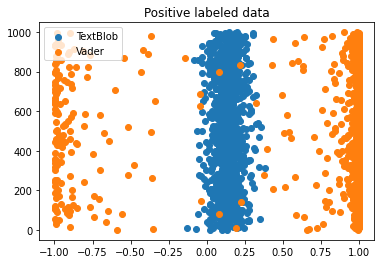

<Figure size 432x288 with 0 Axes>

In [22]:
y = list(range(0, len(txt_blb_scores)))

plt.title("Positive labeled data")
    
plt.scatter(txt_blb_scores, y, label = 'TextBlob')

plt.scatter(vader_scores, y,  label = 'Vader')

plt.legend(loc="upper left")

f = plt.figure()

plt.show()

<b>Process NEGATIVE sentiment samples</b>

In [19]:
txt_blb_scores_n = []
vader_scores_n = []

for filename in os.listdir(negative_folder):
    with open(os.path.join(negative_folder, filename), 'r') as f:
        txt = f.read()
        txt_blb_score = TextBlob(txt)
        vader_score = analyser.polarity_scores(txt)
        txt_blb_scores_n.append(txt_blb_score.polarity)
        vader_scores_n.append(vader_score['compound'])

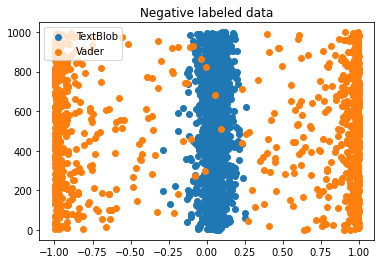

In [21]:
y = list(range(0, len(txt_blb_scores)))

plt.title("Negative labeled data")
    
plt.scatter(txt_blb_scores_n, y, label = 'TextBlob')

plt.scatter(vader_scores_n, y,  label = 'Vader')

plt.legend(loc="upper left")

plt.show()